In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
X, y = make_blobs(n_samples = 1000, centers = 3, n_features = 2, random_state = 23)

In [4]:
X.shape

(1000, 2)

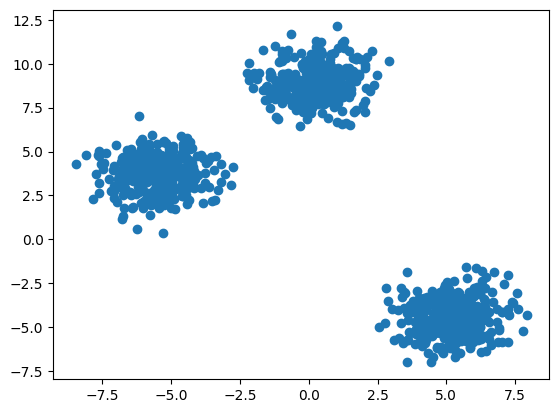

In [7]:
plt.scatter(X[:,0], X[:,1])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [9]:
from sklearn.cluster import KMeans

In [10]:
## Manual Process
## Elbow Method to select the K value

wcss = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters = k, init = 'k-means++')
  kmeans.fit(X_train)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [11]:
wcss

[34827.57682552021,
 7935.437286145418,
 1319.2730531585612,
 1140.4677884655125,
 991.9461536135117,
 853.5419769386793,
 754.3690157660691,
 668.9923940372158,
 578.2255936839397,
 531.3846583938489]

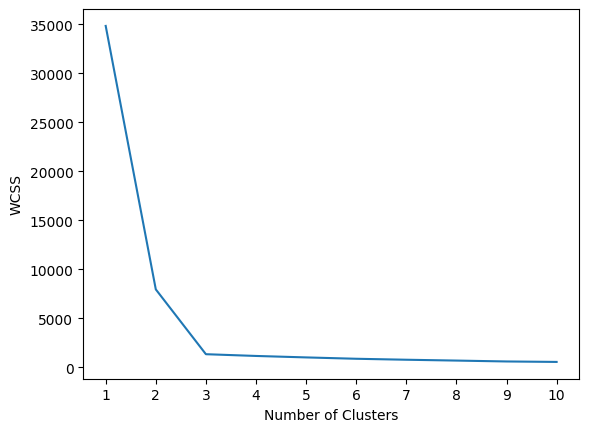

In [12]:
## Plot elbow curve
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')

In [14]:
y_labels = kmeans.fit_predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


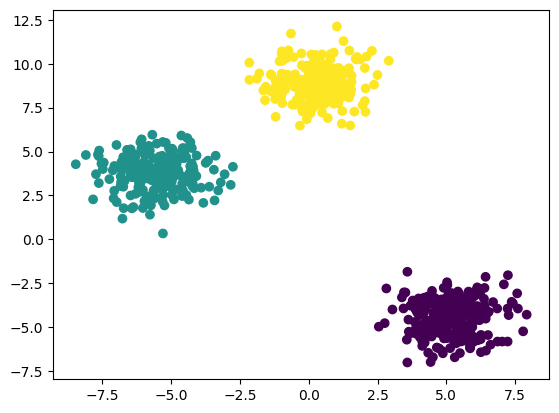

In [15]:
plt.scatter(X_train[:,0], X_train[:,1], c = y_labels)

In [16]:
kmeans.predict(X_test)

array([2, 2, 2, 0, 1, 2, 0, 0, 1, 0, 2, 2, 1, 0, 2, 0, 0, 2, 1, 2, 2, 2,
       0, 2, 2, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 2,
       0, 1, 0, 2, 2, 0, 1, 2, 0, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 0,
       0, 2, 1, 1, 2, 2, 1, 0, 0, 2, 0, 0, 2, 2, 1, 1, 0, 1, 0, 0, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 0, 1, 2,
       2, 1, 0, 1, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 2,
       2, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2, 2, 1, 1,
       1, 0, 0, 2, 0, 1, 0, 2, 1, 1, 0, 1, 0, 2, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 2, 2, 0, 2, 0, 1, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       0, 2, 1, 0, 1, 2, 2, 1, 2, 2, 2, 2, 1, 0, 1, 1, 0, 2, 0, 2, 1, 2,
       2, 1, 2, 0, 2, 2, 1, 2, 0, 0, 0, 2, 0, 1, 2, 2, 0, 2, 0, 0, 0, 2,
       0, 1, 2, 0, 0, 1, 0, 1, 1, 1, 0, 2, 1, 2, 1, 0, 0, 0, 2, 2, 0, 0,
       2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2,

In [17]:
y_test_label = kmeans.predict(X_test)

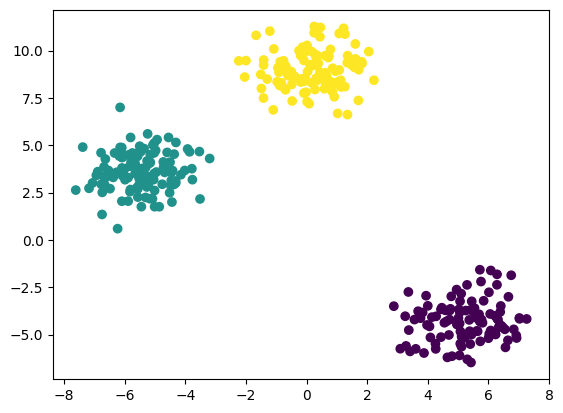

In [20]:
plt.scatter(X_test[:,0], X_test[:,1], c = y_test_label)

In [21]:
## Knee Locator
!pip install kneed

In [22]:
from kneed import KneeLocator

In [23]:
kl = KneeLocator(range(1, 11), wcss, curve = 'convex', direction = 'decreasing')
kl.elbow

3

In [24]:
## Performance metrics
## Silhoutte score
from sklearn.metrics import silhouette_score

In [27]:
silhouette__coefficients = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters = k, init = 'k-means++')
  kmeans.fit(X_train)
  score = silhouette_score(X_train, kmeans.labels_)
  silhouette__coefficients.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [28]:
silhouette__coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.4814001336222496,
 0.33801561536892943,
 0.3372127911346218,
 0.3411919974447539,
 0.34267903320779386,
 0.3421722443611388]

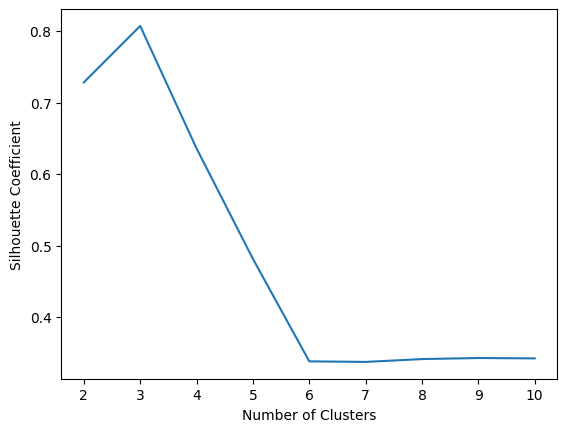

In [32]:
## Plotting the Silhouette score
plt.plot(range(2, 11), silhouette__coefficients)
plt.xticks(range(2, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()